In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from statsmodels.formula.api import ols

In [2]:
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Life Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscop

In [3]:
#Load data into Pandas DataFrame Object
df = pd.DataFrame(data = X)

In [4]:
print(df)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3             0.1140        0.1550 

In [5]:
# add target variable into df
df['target'] = y

In [6]:
print(df)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  target  
0             0.1010        0.1500      15  
1             0.0485        0.0700       7  
2             0.1415        0.2100       9  
3  

In [7]:
#check for null and missing values in the data
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
target            0
dtype: int64

In [8]:
#check for inconsistencies
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,target
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,target
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
df.iloc[4]

Sex                    I
Length              0.33
Diameter           0.255
Height              0.08
Whole_weight       0.205
Shucked_weight    0.0895
Viscera_weight    0.0395
Shell_weight       0.055
target                 7
Name: 4, dtype: object

In [11]:
# replace categorical Sex to numeric (M = 0, F = 1, I (infant) = 2)
df['Sex'].replace(['M', 'F', 'I'], [0,1,2], inplace = True)

In [12]:
df.iloc[4]

Sex               2.0000
Length            0.3300
Diameter          0.2550
Height            0.0800
Whole_weight      0.2050
Shucked_weight    0.0895
Viscera_weight    0.0395
Shell_weight      0.0550
target            7.0000
Name: 4, dtype: float64

In [13]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,target
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
df['target']

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: target, Length: 4177, dtype: int64

In [15]:
df.rename(columns={'target':'Rings'}, inplace = True)

In [16]:
df.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [17]:
ring_counts = df['Rings'].value_counts().sort_index()
ring_counts

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

<BarContainer object of 28 artists>

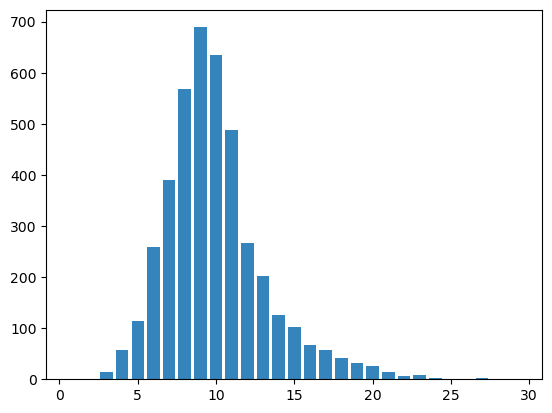

In [18]:
# look at distribution of target feature 'Age'
plt.bar(ring_counts.index, ring_counts.values, align='center', alpha=0.9)

In [19]:
correlation = df.corr()
target_corr = correlation['Rings']
target_corr

Sex              -0.351822
Length            0.556720
Diameter          0.574660
Height            0.557467
Whole_weight      0.540390
Shucked_weight    0.420884
Viscera_weight    0.503819
Shell_weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

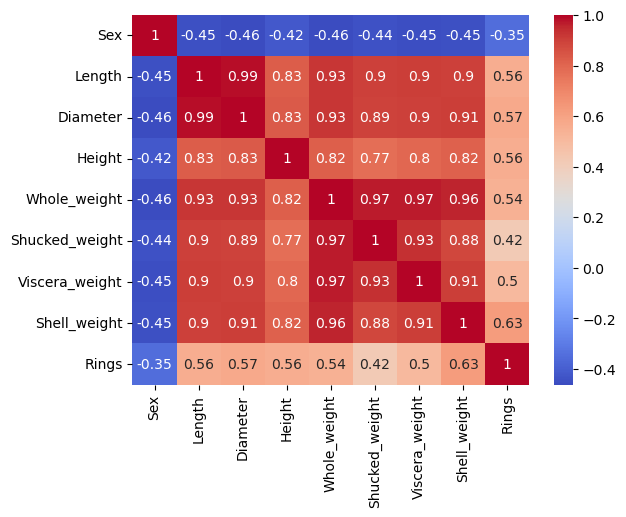

In [20]:
# correlation heatmap with all features/target
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.show()

In [21]:
# set x and y
X = df.drop(['Rings', 'Sex', 'Shucked_weight', 'Viscera_weight'], axis = 1)
y = df['Rings']

In [22]:
# standardize/normalize data
s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X))

In [23]:
# split data by 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2923, 5)
(1254, 5)
(2923,)
(1254,)


In [24]:
# fit ordinary linear regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

In [26]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set
--------------------------------------
RMSE is 2.3581046397996284
R2 score is 0.4702126532289115




In [27]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

In [28]:
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for testing set
--------------------------------------
RMSE is 2.4530263675432655
R2 score is 0.40690995332884317


In [29]:
X_train_off = sm.add_constant(X_train)
smRegression = sm.OLS(y_train, X_train_off)
 
model = smRegression.fit()
print(model.summary())
ypred = model.predict(X_train_off)
rmse = sm.tools.eval_measures.rmse(y_train, ypred)
rmse

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     517.8
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:18:24   Log-Likelihood:                -6655.1
No. Observations:                2923   AIC:                         1.332e+04
Df Residuals:                    2917   BIC:                         1.336e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9565      0.044    227.981      0.0

2.3581046397996284

In [30]:
# hyperparameters for SGD
param_grid = {
    'loss': ['squared_error'],
    'penalty': ['l1', 'l2'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'max_iter': [100, 500, 1000, 2500, 5000, 7500, 10000]
}

In [31]:
sgd = SGDRegressor()

In [32]:
# grid search optimal hyperparameters
grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5, n_jobs=-1)

In [33]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_error'],
                         'max_iter': [100, 500, 1000, 2500, 5000, 7500, 10000],
                         'penalty': ['l1', 'l2']})

In [34]:
results = grid_search.cv_results_

In [43]:
best_params = grid_search.best_params_
best_params

{'alpha': 0.0001,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 2500,
 'penalty': 'l1'}

In [44]:
best_model = grid_search.best_estimator_
best_model

SGDRegressor(max_iter=2500, penalty='l1')

In [45]:
test_score = best_model.score(X_test, y_test)
test_score

0.40779106866776027

In [46]:
param_alpha = results['param_alpha'].data.astype(float)
param_learning_rate = results['param_learning_rate'].data.astype(str)
param_max_iter = results['param_max_iter'].data.astype(int)
mean_test_score = results['mean_test_score']

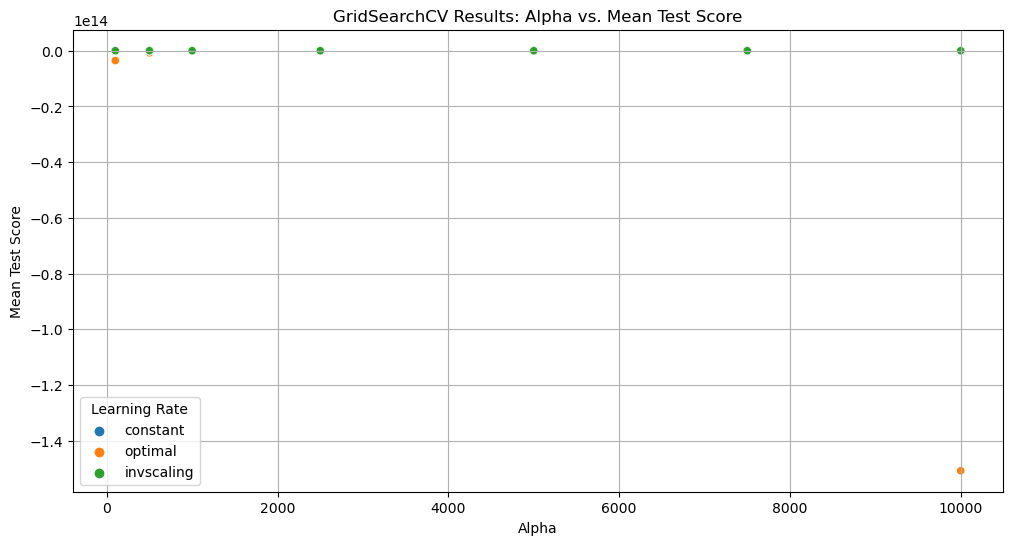

In [47]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=param_max_iter, y=mean_test_score, hue=param_learning_rate)
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.title('GridSearchCV Results: Alpha vs. Mean Test Score')
plt.legend(title='Learning Rate')
plt.grid(True)
plt.show()

In [48]:
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)
train_error = mean_squared_error(y_train, train_predictions)
test_error = mean_squared_error(y_test, test_predictions)
train_error

5.570156266388395

In [49]:
test_error

6.008398791312862

In [50]:
y_pred = grid_search.predict(X_test)
r_squared = r2_score(y_test,y_pred)
r_squared 

0.40779106866776027